# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 21 February, 2025

## ---------------------------------------------------------------------------------------------------------------


In [44]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Before Starting the Scenario Task Implement all the code given in the manual and implement it on any image

### Histogram Processing
#### Introduction:

 A histogram represents the distribution of pixel intensities in an image. It is used for analyzing and enhancing image contrast.

 Why Use It?

 - Identifies intensity distribution in an image.
 - Enhances the dynamic range and contrast of an image.
 - Enables techniques like histogram equalization and matching.


 Basic Syntax:
 cv2.calcHist([image], [channel], None, [bins], [range])

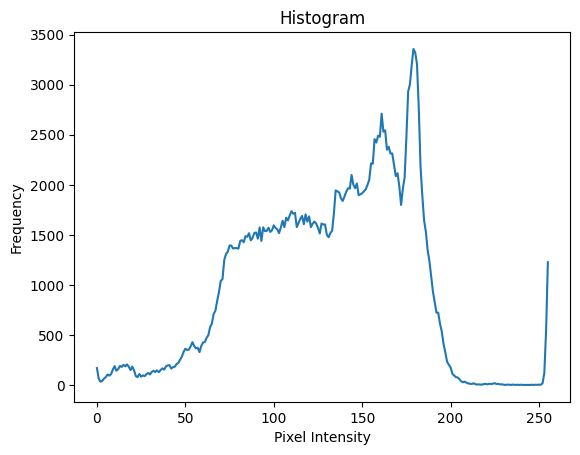

In [ ]:
image = cv2.imread('src.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image],[0],None,[256],[0,256])
## (src,gray/rgb,mask(output),histSize,ranges)

plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


### Histogram Equalization
#### Introduction:

 Histogram equalization redistributes the pixel intensities of an image to achieve uniform intensity distribution, enhancing its contrast.

 Why Use It?
 - Improves visibility in low-contrast images.
 - Brings out hidden details by spreading pixel intensity levels across the entire dynamic range.

 Basic Syntax:
 cv2.equalizeHist(image)

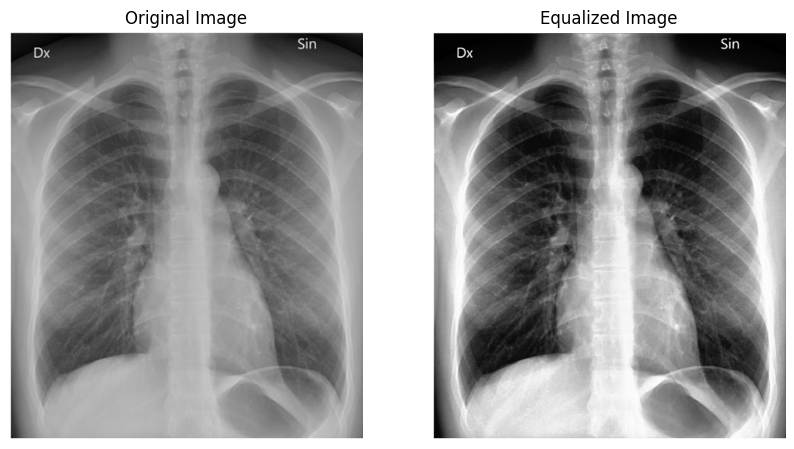

In [ ]:
equalized_image = cv2.equalizeHist(image)
hist2 = cv2.calcHist([equalized_image],[0],None,[256],[0,256])

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Equalized Image')
plt.imshow(equalized_image,cmap = 'gray')
plt.axis('off')
plt.show()


plt.show()



Text(0, 0.5, 'Frequency')

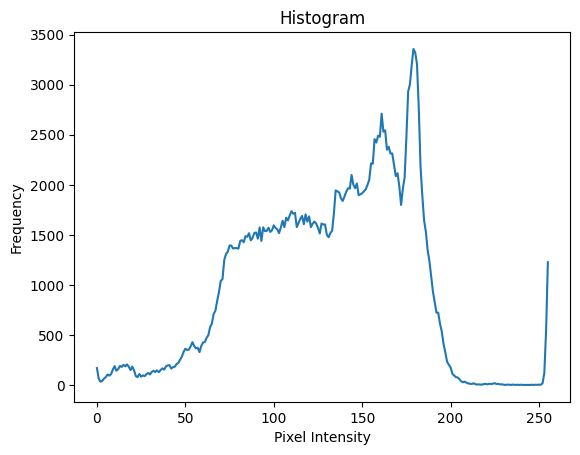

In [ ]:
plt.plot(hist.ravel())
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

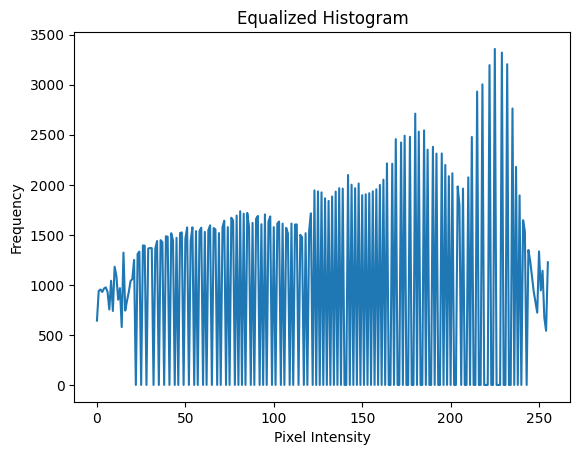

In [ ]:
plt.plot(hist2.ravel())
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


### Histogram Matching
#### Introduction
 Histogram matching is a process for adjusting the pixel intensity distribution of one image to match the histogram of another. It's commonly used in image
 processing for normalization, style transfer, and image enhancement.

 Why Use It?
 - Style transfer in image editing.
 - Normalizing images for machine learning models.
 - Enhancing contrast in medical imaging.

 ### Discrete Histogram Matching

 #### Introduction
 Discrete Histogram Matching is the process of modifying the pixel values of one image (source) to match the histogram of another image (reference). It assumes that
 the pixel intensities are discrete values.

 #### Steps Involved:
 - Compute the histograms of both the source and reference images.
 - Calculate the cumulative distribution function (CDF) of the histograms.
 - Map the pixel intensities of the source image to match the CDF of the reference image.
 - Generate the output image

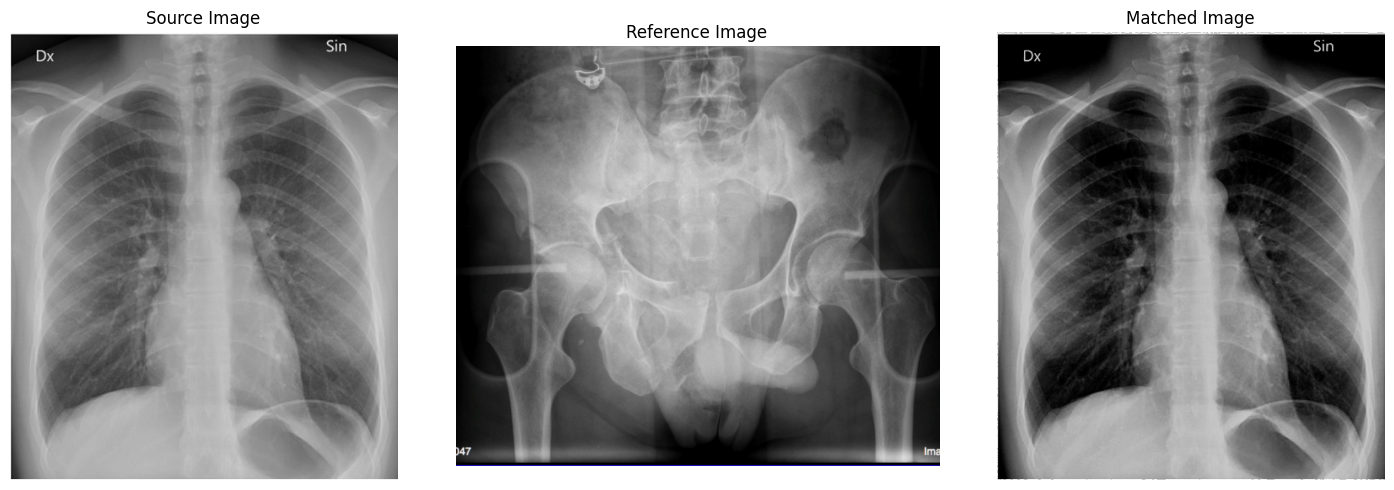

In [ ]:
def match_histogram(source, reference):
  src_hist, src_bins = np.histogram(source.flatten(), 256, [0,256])
  ref_hist, ref_bins = np.histogram(reference.flatten(), 256, [0,256])
  src_cdf = np.cumsum(src_hist).astype(float)
  ref_cdf = np.cumsum(ref_hist).astype(float)
  src_cdf_normalized = src_cdf / src_cdf[-1]
  ref_cdf_normalized = ref_cdf / ref_cdf[-1]
  mapping = np.zeros(256, dtype=np.uint8)
  for i in range(256):
    closet_idx = np.argmin(np.abs(abs(ref_cdf_normalized - src_cdf_normalized[i])))
    mapping[i] = closet_idx
  matched = mapping[source]
  return matched

source = cv2.imread('src.jpg')
reference = cv2.imread('Scanerio 01.jpg')
matched_image = match_histogram(source,reference)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Source Image')
plt.imshow(source,cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Reference Image')
plt.imshow(reference,cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Matched Image')
plt.imshow(matched_image,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



 ### Global vs. Local Histogram Equalization

 #### Introduction
 Global Histogram Equalization: Applies histogram equalization to the entire image, enhancing contrast globally.

 Local Histogram Equalization: Enhances contrast in small, localized regions by equalizing the histogram within a sliding window or neighbourhood.

 Why Use It?

 Adjust image intensity levels to enhance contrast or correct brightness.
 Ensure unique mapping between input and output intensities.

 Basic Syntax:
 cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

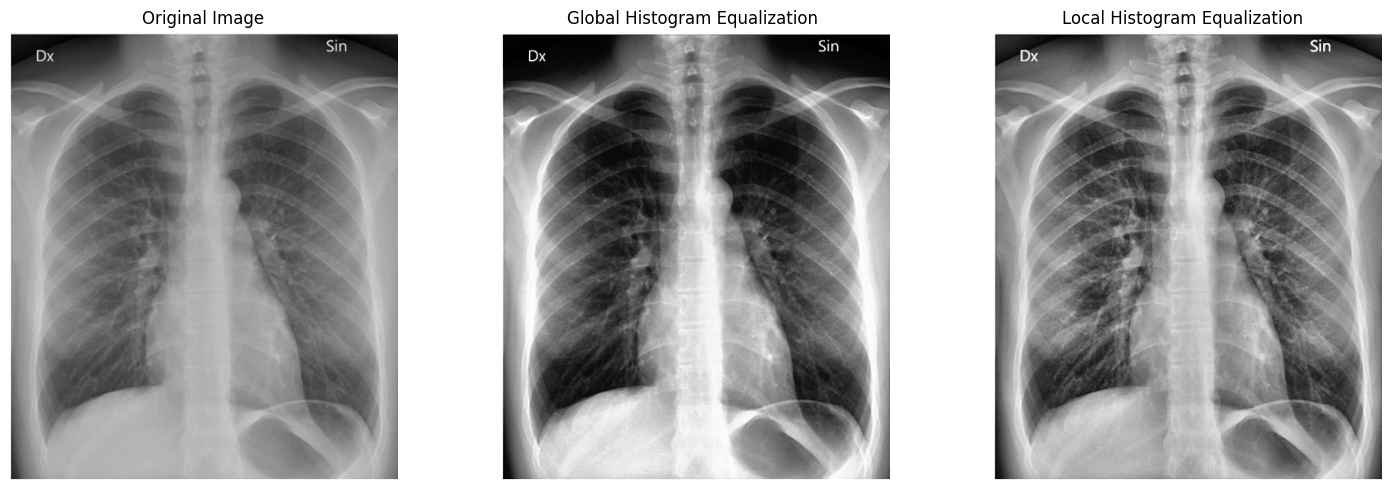

In [ ]:
## cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)

global_eq = cv2.equalizeHist(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_eq = clahe.apply(image)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Global Histogram Equalization ')
plt.imshow(global_eq,cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Local Histogram Equalization  ')
plt.imshow(local_eq,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



### Histogram Stretching
 #### Introduction
 - Histogram stretching is a technique used in image processing to improve the overall brightness or contrast of an image.
 - It involves rescaling the pixel intensity values of an image so that they span a wider range (e.g., from 0 to 255 in an 8-bit grayscale image).
 - The process essentially "stretches" the histogram to cover the full intensity range, which enhances the visibility of details in the image.

 Why Use It?

 Used to improve the overall image contrast and brightness

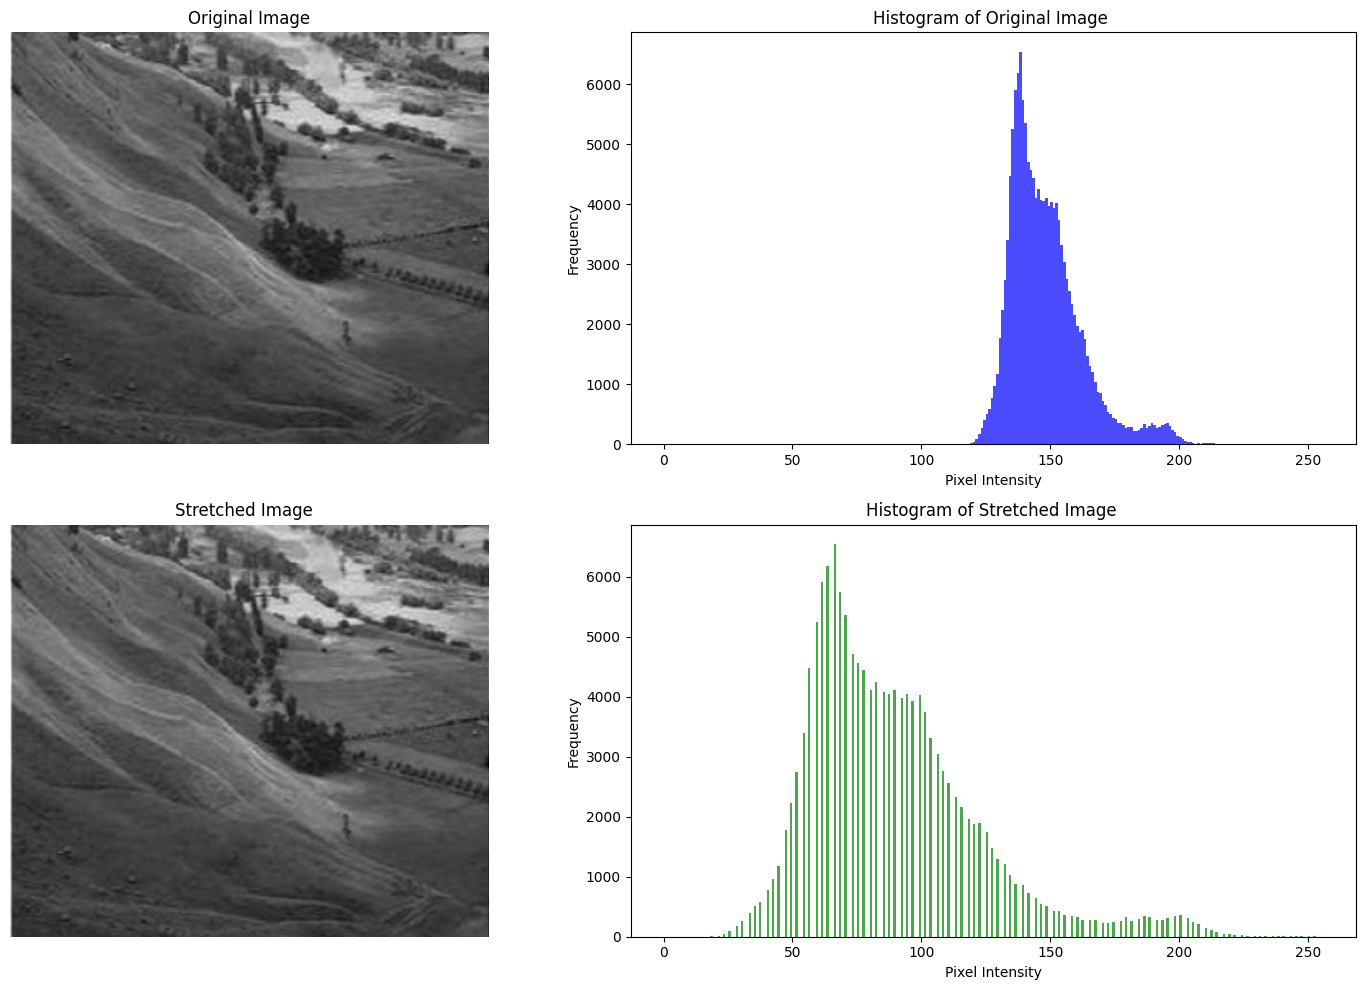

In [48]:
image_to_stretch = cv2.imread('stretch2.jpg', cv2.IMREAD_GRAYSCALE)

min_val = np.min(image_to_stretch)
max_val = np.max(image_to_stretch)

stretched_image = ((image_to_stretch-min_val) / (max_val - min_val) *255).astype(np.uint8)

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image_to_stretch,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.hist(image_to_stretch.ravel(),bins = 256, range=(0,256),color = 'blue', alpha = 0.7)
plt.title('Histogram of Original Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
plt.title('Stretched Image  ')
plt.imshow(stretched_image,cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.hist(stretched_image.ravel(),bins = 256, range=(0,256),color = 'green', alpha = 0.7)
plt.title('Histogram of Stretched Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



### Scenario no 01 : Histogram Processing for Medical Imaging
Analyze the intensity distribution of a medical image (e.g., an X-ray) to identify underexposed or overexposed
regions.
#### Tasks:
1. Load a medical image and plot its histogram.
2. Identify whether the image is underexposed, overexposed, or well-balanced.

#### Answer:
From the histogram, we can see that the frequency of intensity values is distributed within the range of 0 to 200, meaning the image is well-balanced with a good range of contrast

- Underexposed Image (Too Dark)
If the histogram is clustered towards the lower intensity values (0-50), most of the pixels are dark, indicating poor visibility in shadows.

- Overexposed Image (Too Bright)
If the histogram is shifted towards higher intensity values (200-255), the image appears too bright, often losing details in the highlights.

3. Write a function to enhance the image based on the histogram characteristics (e.g., by stretching intensity
values).



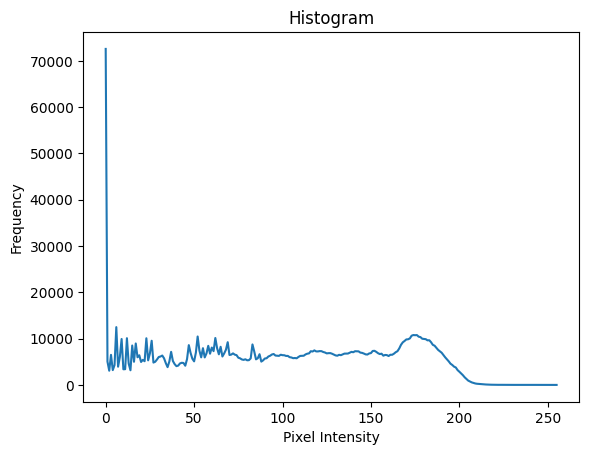

In [ ]:
image2 = cv2.imread('Scanerio 01.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image],[0],None,[256],[0,256])
## (src,gray/rgb,mask(output),histSize,ranges)

plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

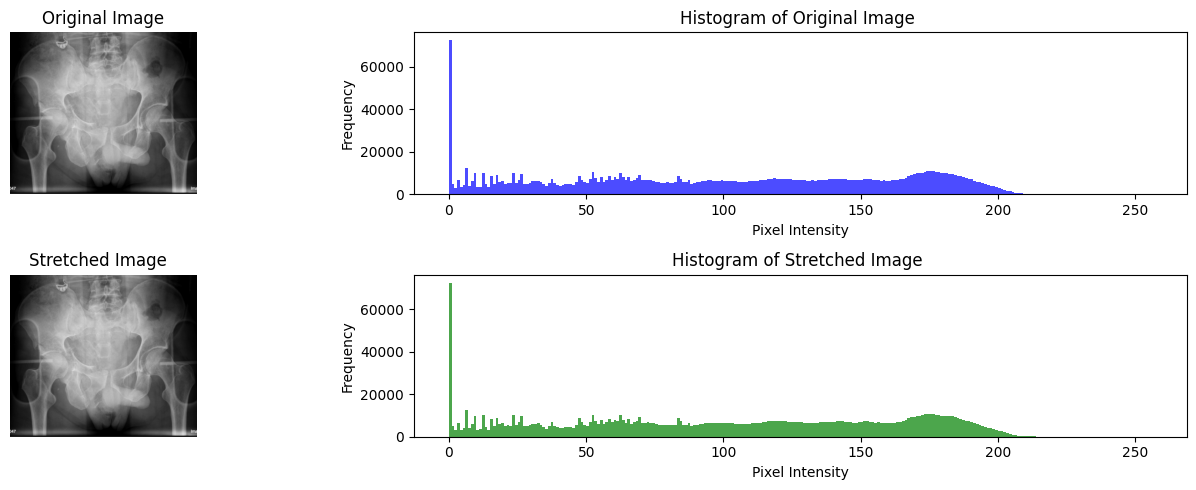

In [ ]:
min_val2 = np.min(image)
max_val2 = np.max(image)

stretched_image2 = ((image-min_val2) / (max_val2 - min_val2) *255).astype(np.uint8)

plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image2,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.hist(image2.ravel(),bins = 256, range=(0,256),color = 'blue', alpha = 0.7)
plt.title('Histogram of Original Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
plt.title('Stretched Image  ')
plt.imshow(stretched_image2,cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.hist(stretched_image2.ravel(),bins = 256, range=(0,256),color = 'green', alpha = 0.7)
plt.title('Histogram of Stretched Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Scenario 02: Global Histogram Equalization for Satellite Imaging
Satellite images are often affected by poor contrast due to atmospheric conditions. Use global histogram
equalization to enhance a satellite image.
#### Tasks:
1. Load a satellite image.
2. Apply global histogram equalization.
3. Compare the original and equalized images.

#### Answer:
We can see that the equalized image is easier to understand and is more bright than the original image. The roads and the intersections can be clearly seen as well.


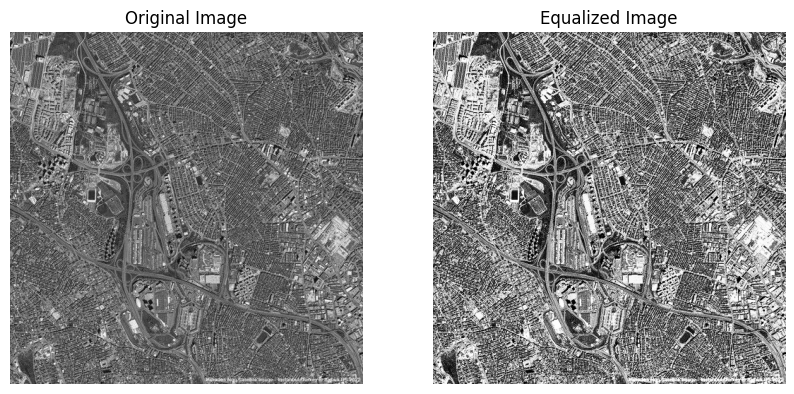

In [ ]:
image_s = cv2.imread('Scanerio 02.jpg', cv2.IMREAD_GRAYSCALE)

equalized_image_s = cv2.equalizeHist(image_s)
hist_s = cv2.calcHist([equalized_image_s],[0],None,[256],[0,256])

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(image_s,cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Equalized Image')
plt.imshow(equalized_image_s,cmap = 'gray')
plt.axis('off')
plt.show()


plt.show()


### Scenario 03: Local Histogram Equalization for Wildlife Photography

Wildlife photographers often face challenges with uneven lighting. Use CLAHE to enhance a wildlife image
taken in uneven lighting.

#### Tasks:
1. Load a wildlife image.
2. Apply CLAHE with appropriate parameters (clipLimit and tileGridSize).
3. Compare the original and enhanced images.

#### Answer:
Global Histogram Equalization : Enhances contrast by adjusting the intensity distribution across the entire image. It works well for images with uniform lighting but can over-amplify noise in some areas.

Local Histogram Equalization : Enhances contrast by applying histogram equalization to small regions (tiles) of the image. This method improves details in different parts of the image but may introduce artifacts if not handled properly.

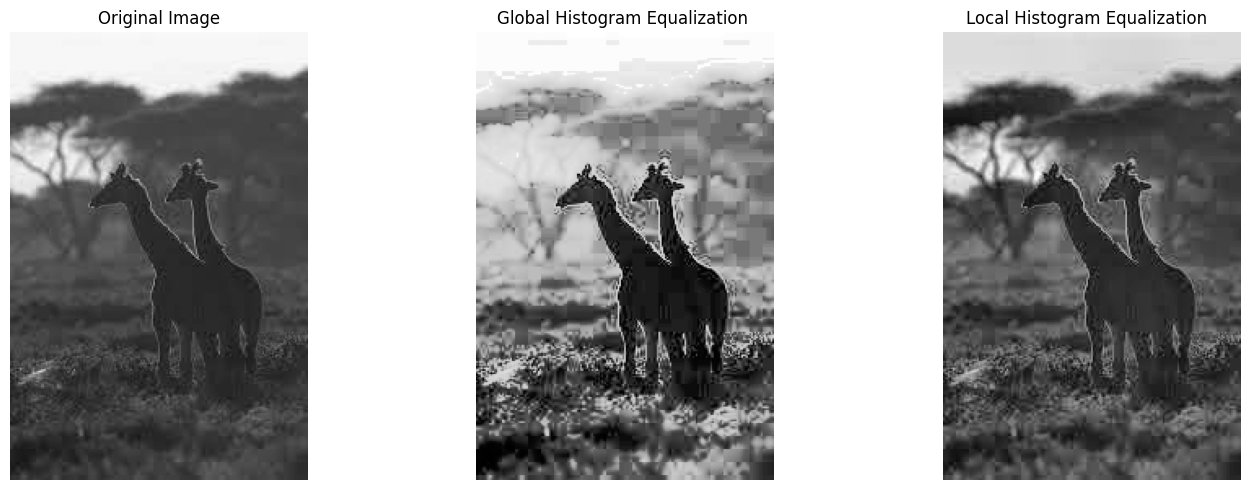

In [ ]:
image_w = cv2.imread('Scanerio 03.jpg', cv2.IMREAD_GRAYSCALE)

global_eq_w = cv2.equalizeHist(image_w)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_eq_w = clahe.apply(image_w)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(image_w,cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Global Histogram Equalization ')
plt.imshow(global_eq_w,cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Local Histogram Equalization  ')
plt.imshow(local_eq_w,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()